In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
class Integrator():
    
    def __init__(self,f, h):
        self.function = f
        self.h = h
        self.times = None
        self.qs = None
        self.ps = None
    
    def step(self, t, q, p):
        q,p = self.function(q,p)
        return t, q, p
    
    def integrate(self, interval, q, p):
        t = interval[0]
        t_fin = interval[1]
        
        self.times = [t]
        self.qs = [np.array(q)]
        self.ps = [np.array(p)]        

        while t<t_fin:
            t, q, p = self.step(t, q, p)
            self.times.append(t)
            self.qs.append(np.array(q))
            self.ps.append(np.array(p))

    def plot_orbit(self,n):
        plot_q = [element[n] for element in self.qs]
        plot_p = [element[n] for element in self.ps]           
        
        plt.plot(plot_p,plot_q)
        plt.gca().axis('equal')   

In [35]:
   
class SymplecticEuler(Integrator):
    
    def step(self, t, q, p):
        
        q = np.array(q)
        p = np.array(p)
        
        Q, P = self.function(q,p)
        
        p = p + self.h*np.array(P)
        
        Q, P = self.function(q,p)
        
        q = q + self.h*np.array(Q)
        
        t = t+self.h
        
        return t, q, p

In [15]:
class ForwardEuler(Integrator):
    
    def step(self, t, q, p):
        
        Q, P = self.function(q,p)
        
        p = p + self.h*P
                
        q = q + self.h*Q
        
        t = t+self.h
        
        return t, q, p

In [26]:
class RungeKutta4(Integrator):
    
    def step(self, t, q, p):
        
        Q1, P1 = self.function(q,p)
        
        Q2, P2 = self.function(q+Q1*self.h/2, p + P1*self.h/2)
        
        Q3, P3 = self.function(q+Q2*self.h/2, p + P2*self.h/2)
        
        Q4, P4 = self.function(q+Q3*self.h, p + P3*self.h)
        
        q = q + 1/6*self.h*(Q1 + 2*Q2 + Q3 +Q4)

        p = p + 1/6*self.h*(P1 + 2*P2 + P3 +P4)

        t = t + self.h

        return t, q, p

In [3]:
class SymplecticOrder4(Integrator):
    
    def __init__(self, h, function):
        self.h = h
        self.function = function

        # precalculate constants
        self.c1 = 1/(2*(2-2**(1/3)))
        self.c4 = self.c1
        self.c2 = (1 - 2**(1/3))/(2*(2-2**(1/3)))
        self.c3 = self.c2
        self.d1 = 1/((2-2**(1/3)))
        self.d3 = self.d1
        self.d2 = ( - 2**(1/3))/(2-2**(1/3))
        
    def step(self, t, q, p):
        q = self.Q_step(self.c4, q, p)
        p = self.P_step(self.d3, q, p)
        q = self.Q_step(self.c3, q, p)
        p = self.P_step(self.d2, q, p)
        q = self.Q_step(self.c2, q, p)
        p = self.P_step(self.d1, q, p)
        q = self.Q_step(self.c1, q, p)

        t += self.h
        return t, q, p
    
    def Q_step(self, c, q, p):
        Q, _ = self.function(q, p)
        return q + [self.h*c*q_i for q_i in Q]
    
    def P_step(self, d, q, p):
        _, P = self.function(q, p)
        return p + [self.h*d*p_i for p_i in P]

In [36]:
def hoscillator(q,p):
    q = np.array(q)
    p = np.array(p)

    q_out = p
    p_out = -q
    
    return q_out, p_out

In [38]:
sympeuler = SymplecticEuler(hoscillator,0.1)

In [39]:

sympeuler.integrate([0,2*np.pi],1,0)
print(sympeuler.qs)
print(sympeuler.ps)

sympeuler.plot_orbit(1)

[array(1), array(0.99), array(0.9701), array(0.940499), array(0.90149301), array(0.85347209), array(0.79691645), array(0.73239164), array(0.66054292), array(0.58208877), array(0.49781373), array(0.40856056), array(0.31522177), array(0.21873077), array(0.12005247), array(0.02017364), array(-0.07990693), array(-0.17918843), array(-0.27667805), array(-0.37140088), array(-0.46240971), array(-0.54879443), array(-0.62969122), array(-0.70429109), array(-0.77184805), array(-0.83168653), array(-0.88320815), array(-0.92589768), array(-0.95932824), array(-0.98316551), array(-0.99717113), array(-1.00120504), array(-0.9952269), array(-0.97929648), array(-0.95357311), array(-0.918314), array(-0.87387175), array(-0.82069079), array(-0.75930292), array(-0.69032201), array(-0.61443789), array(-0.53240939), array(-0.4450568), array(-0.35325363), array(-0.25791793), array(-0.16000306), array(-0.06048815), array(0.03963164), array(0.13935512), array(0.23768504), array(0.33363811), array(0.4262548), array(

TypeError: Integrator.plot_orbit() missing 1 required positional argument: 'n'

In [16]:
forweuler = ForwardEuler(hoscillator,0.1)

In [17]:

forweuler.integrate([0,5*np.pi],1,0)

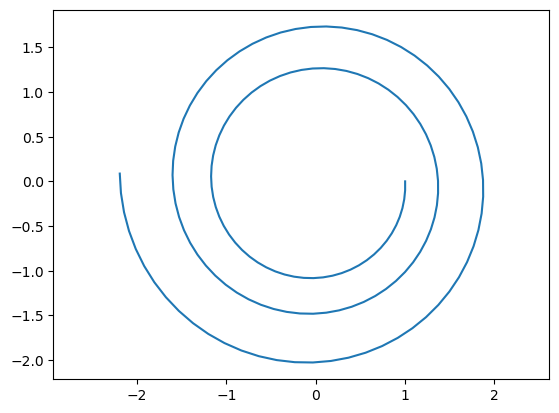

In [11]:
forweuler.plot_orbit()

In [13]:
rk4 = RungeKutta4(hoscillator,0.1)


NameError: name 'RungeKutta4' is not defined

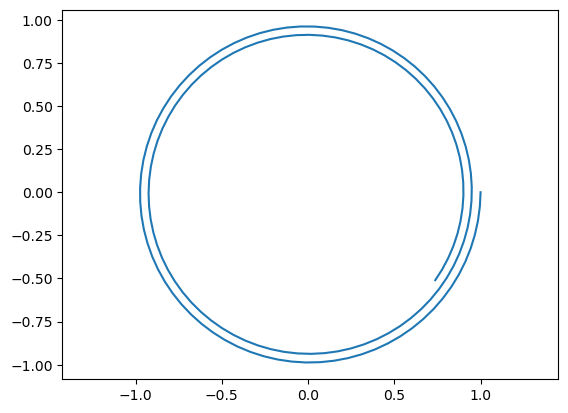

In [ ]:
rk4.h = 0.1

rk4.integrate([0,5*np.pi],1,0)

rk4.plot_orbit()

In [ ]:
sympO4 = SymplecticOrder4(0.1, hoscillator)


In [ ]:
sympO4.h = 0.1

sympO4.integrate([0,5*np.pi],[1,1],[0,0])

sympO4.plot_orbit()

In [ ]:
plt.plot(test.qs, test.ps)

In [ ]:
t, q, p = 0, 1, 0

solution = []

for i in range(10):

    t, q, p = test.step(t, q, p)
    
    solution.append((t ,q, p))
    
    

In [ ]:
solution

In [31]:
mat = np.array([[1, 2, 3],[1,2,3]])
print(mat)
mat2 = np.array(mat)
print(mat2)
np.array_equal(mat,mat2)


[[1 2 3]
 [1 2 3]]
[[1 2 3]
 [1 2 3]]


True